![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Mercury flux check
</b>
</span>

---
**Author**: Lukas Hörtnagl (holukas@ethz.ch) 

</br>

# Description

Checking mercury fluxes for time lags and flux magnitude.

# Imports

In [1]:
import importlib.metadata
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from diive.core.io.filereader import ReadFileType
from diive.core.plotting.histogram import HistogramPlot
import numpy as np
from diive.core.plotting.heatmap_datetime import HeatmapDateTime

warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.86.0


# Load data with pre-defined filetype `EDDYPRO-FLUXNET-CSV-60MIN` in diive

**Flux versions**:
- constant time lag 4.7s, block averaging
- constant time lag 4.7s, linear detrending
- open lag +/- 50s, linear detrending
- open lag +/- 20s, linear detrending

In [2]:
const47block = ReadFileType(filetype='EDDYPRO-FLUXNET-CSV-60MIN', filepath=r"OUT_const_4.7s_60min_block_eddypro_DEG_fluxnet_2025-02-18T094446_adv.csv")
const47lin = ReadFileType(filetype='EDDYPRO-FLUXNET-CSV-60MIN', filepath=r"OUT_const_4.7s_60min_linear_eddypro_DEG_fluxnet_2025-02-15T174513_adv.csv")
open5050 = ReadFileType(filetype='EDDYPRO-FLUXNET-CSV-60MIN', filepath=r"OUT_-50_50s_eddypro_DEG_fluxnet_2025-02-05T151914_adv.csv")
open2020 = ReadFileType(filetype='EDDYPRO-FLUXNET-CSV-60MIN', filepath=r"OUT_-20_20s_eddypro_DEG_fluxnet_2025-02-12T230632_adv.csv")

Reading file OUT_const_4.7s_60min_block_eddypro_DEG_fluxnet_2025-02-18T094446_adv.csv ...
Reading file OUT_const_4.7s_60min_linear_eddypro_DEG_fluxnet_2025-02-15T174513_adv.csv ...
Reading file OUT_-50_50s_eddypro_DEG_fluxnet_2025-02-05T151914_adv.csv ...
Reading file OUT_-20_20s_eddypro_DEG_fluxnet_2025-02-12T230632_adv.csv ...


In [3]:
df_const47block, _ = const47block.get_filedata()
df_const47lin, _ = const47lin.get_filedata()
df_open5050, _ = open5050.get_filedata()
df_open2020, _ = open2020.get_filedata()

# Get data

In [4]:
# Get fluxes
var = 'FHG0'
flux47blk = df_const47block[var].copy()
flux47lin = df_const47lin[var].copy()
flux20lin = df_open2020[var].copy()
flux50lin = df_open5050[var].copy()

# Get SSITC flag
ssitc = 'FHG0_SSITC_TEST'
ssitc47blk = df_const47block[ssitc].copy()
ssitc47lin = df_const47lin[ssitc].copy()
ssitc20lin = df_open2020[ssitc].copy()
ssitc50lin = df_open5050[ssitc].copy()

# Get lags
lag = 'HG0_TLAG_USED'
lag47blk = df_const47block[lag].copy()
lag47lin = df_const47lin[lag].copy()
lag20lin = df_open2020[lag].copy()
lag50lin = df_open5050[lag].copy()

# Rudimentary quality check

In [5]:
# Remove fluxes where SSITC is 2
flux47blk.loc[ssitc47blk == 2] = np.nan 
flux47lin.loc[ssitc47lin == 2] = np.nan 
flux20lin.loc[ssitc20lin == 2] = np.nan 
flux50lin.loc[ssitc50lin == 2] = np.nan 

# Remove outliers
upperlimit = 0.0005
lowerlimit = -0.0005
flux47blk.loc[flux47blk > upperlimit] = np.nan 
flux47blk.loc[flux47blk < lowerlimit] = np.nan 
flux47lin.loc[flux47lin > upperlimit] = np.nan 
flux47lin.loc[flux47lin < lowerlimit] = np.nan 
flux20lin.loc[flux20lin > upperlimit] = np.nan 
flux20lin.loc[flux20lin < lowerlimit] = np.nan 
flux50lin.loc[flux50lin > upperlimit] = np.nan 
flux50lin.loc[flux50lin < lowerlimit] = np.nan

# Plot time series

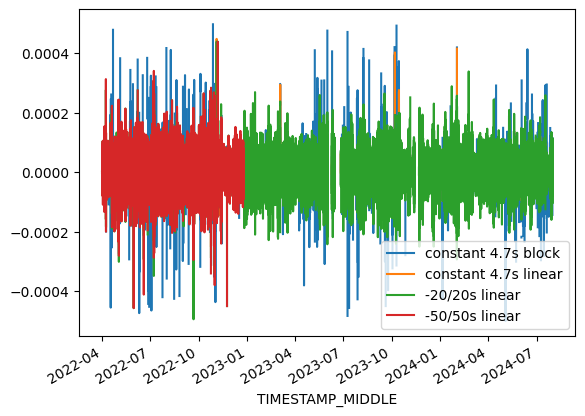

In [6]:
flux47blk.plot(x_compat=True, label="constant 4.7s block")
flux47lin.plot(x_compat=True, label="constant 4.7s linear")
flux20lin.plot(x_compat=True, label="-20/20s linear")
flux50lin.plot(x_compat=True, label="-50/50s linear")
plt.legend();

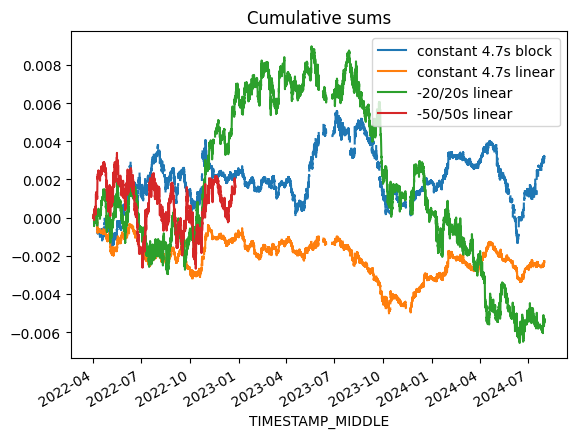

In [7]:
# Plot
flux47blk.cumsum().plot(x_compat=True, label="constant 4.7s block")
flux47lin.cumsum().plot(x_compat=True, label="constant 4.7s linear")
flux20lin.cumsum().plot(x_compat=True, label="-20/20s linear")
flux50lin.cumsum().plot(x_compat=True, label="-50/50s linear")
plt.title("Cumulative sums")
plt.legend();

# Heatmaps fluxes

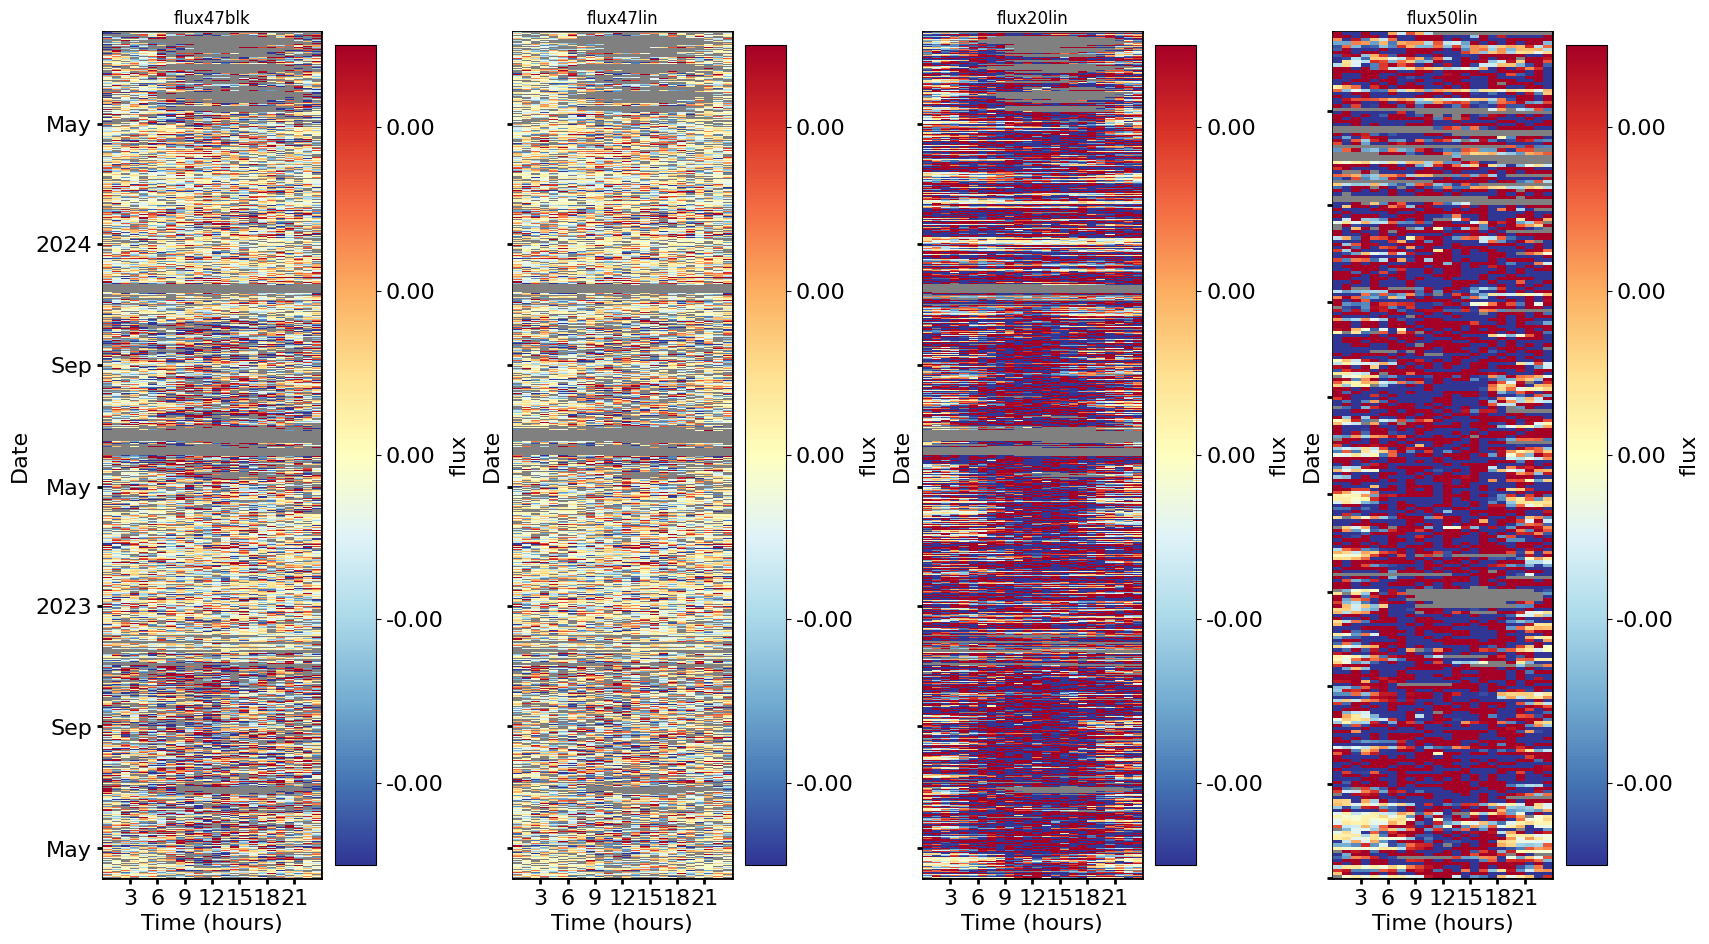

In [8]:
vs = [-0.00005, 0.00005]

# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.5, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

HeatmapDateTime(ax=ax1, series=flux47blk, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax2, series=flux47lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax3, series=flux20lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax4, series=flux50lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()

ax1.set_title("flux47blk", color='black')
ax2.set_title("flux47lin", color='black')
ax3.set_title("flux20lin", color='black')
ax4.set_title("flux50lin", color='black')

ax1.tick_params(left=True, right=False, top=False, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax2.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax3.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax4.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
fig.show()

# Heatmaps lags

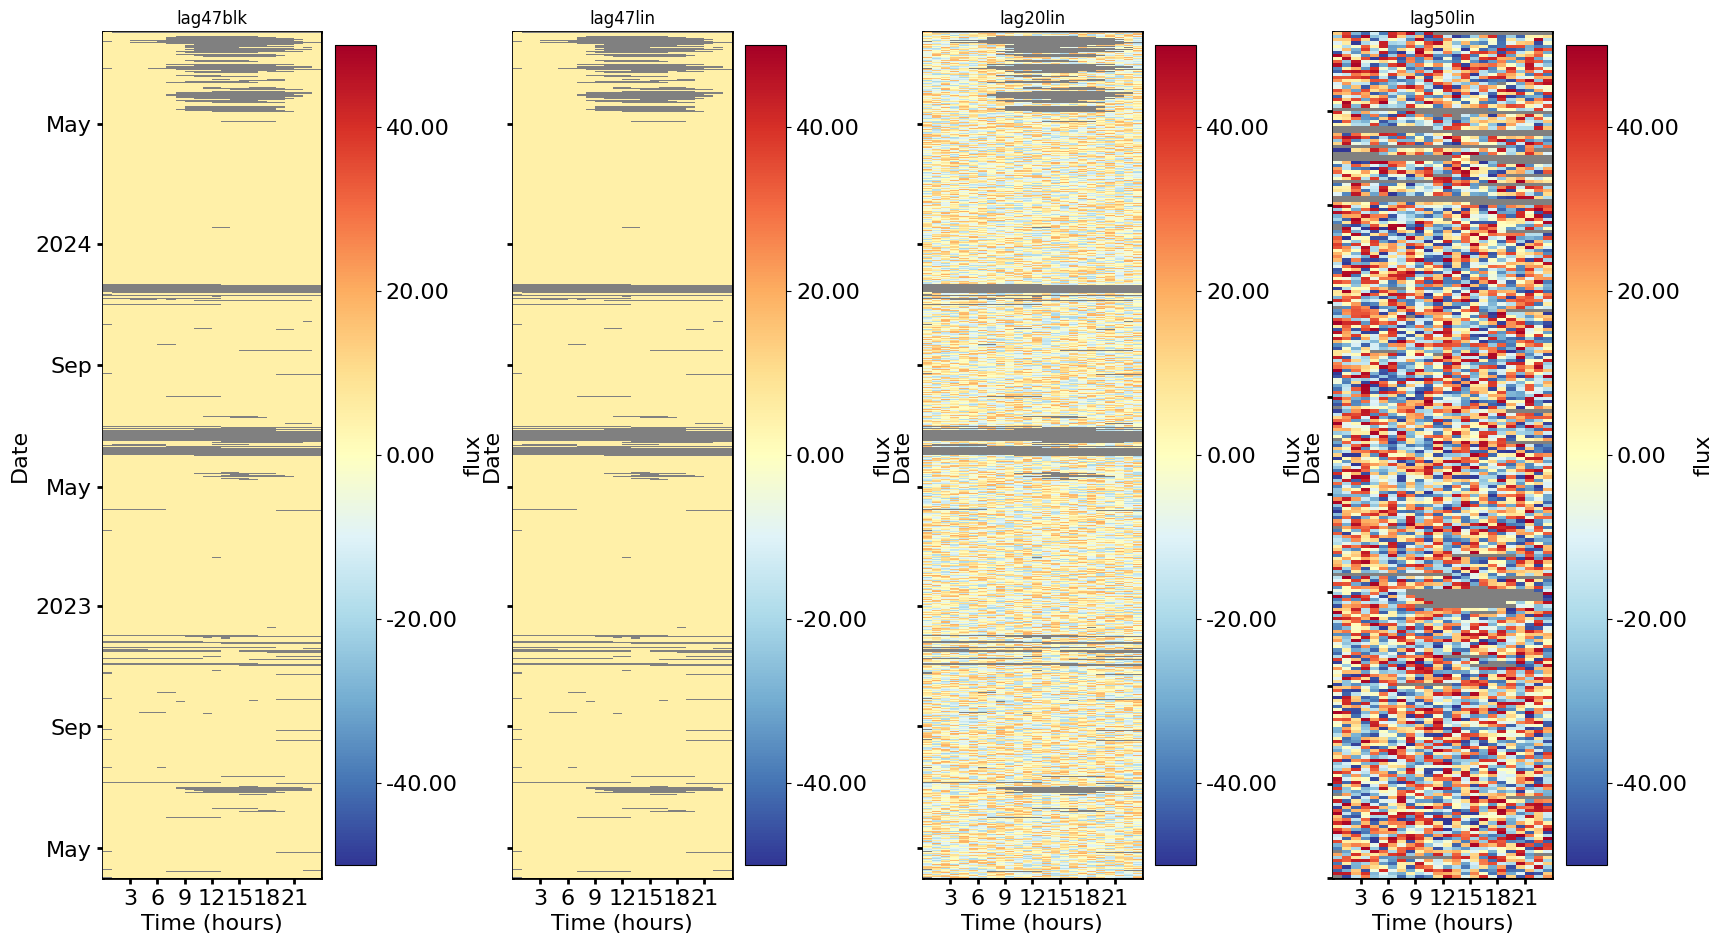

In [9]:
vs = [-50, 50]

# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.5, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

HeatmapDateTime(ax=ax1, series=lag47blk, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax2, series=lag47lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax3, series=lag20lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()
HeatmapDateTime(ax=ax4, series=lag50lin, zlabel="flux", vmin=vs[0], vmax=vs[1]).plot()

ax1.set_title("lag47blk", color='black')
ax2.set_title("lag47lin", color='black')
ax3.set_title("lag20lin", color='black')
ax4.set_title("lag50lin", color='black')

ax1.tick_params(left=True, right=False, top=False, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax2.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax3.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax4.tick_params(left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)
fig.show()

# Histogram lags from -20/20s linear

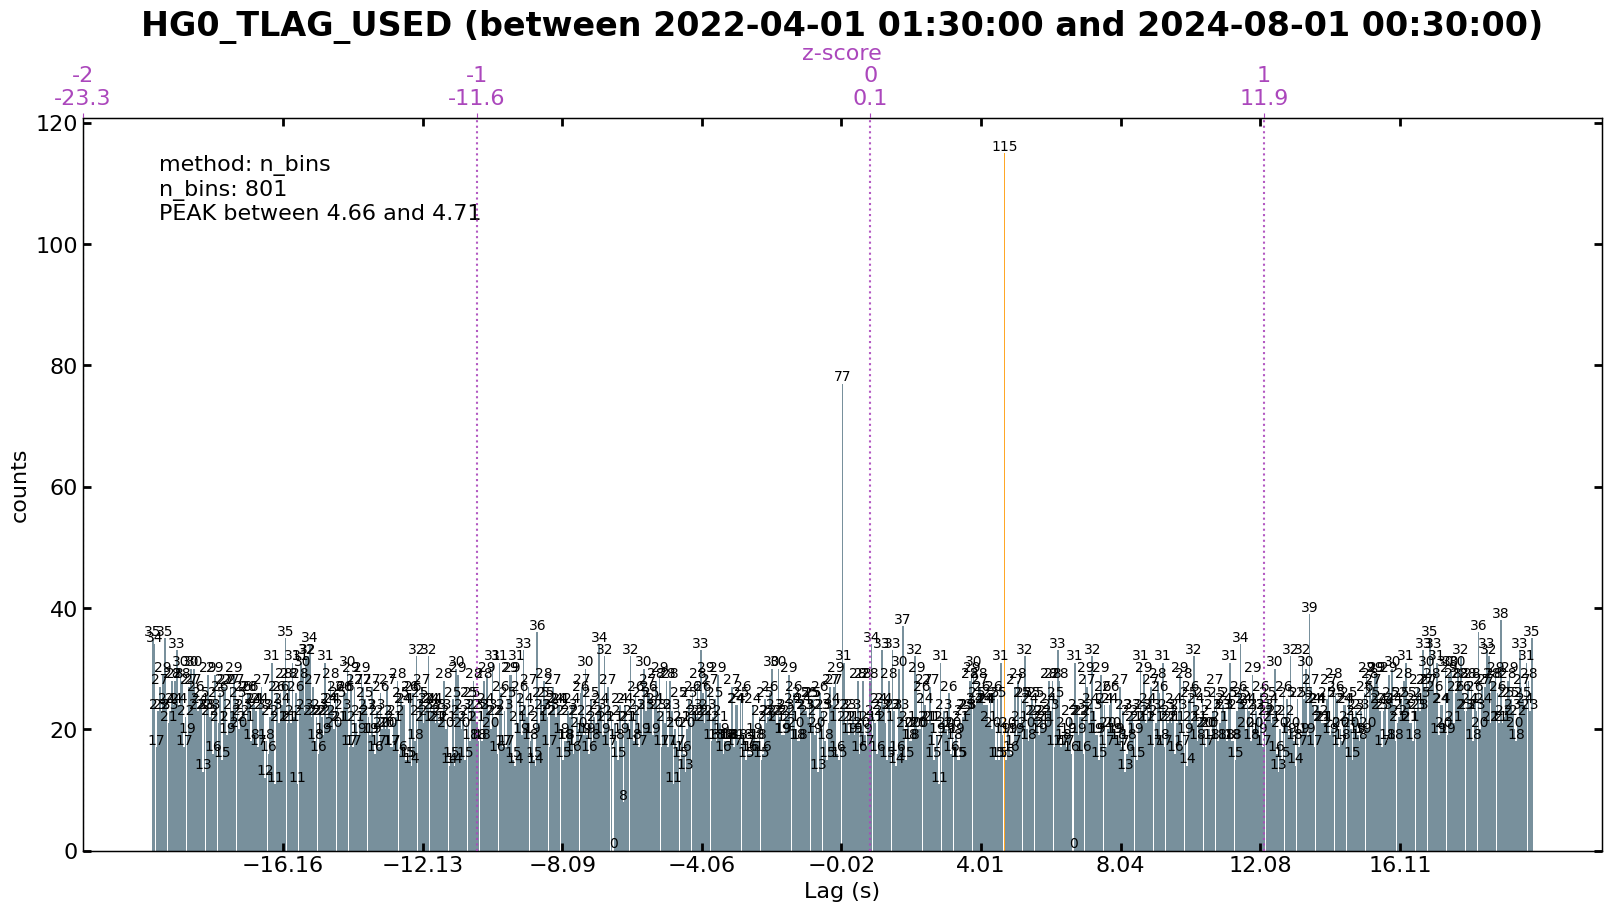

In [10]:
hist = HistogramPlot(
    s=lag20lin,
    method='n_bins',
    n_bins=801,    
    xlabel='Lag (s)',
    highlight_peak=True,
    show_zscores=True,
    show_zscore_values=True,
    show_counts=True,
    show_info=True,
    show_grid=False,
    show_title=True    
)
hist.plot()

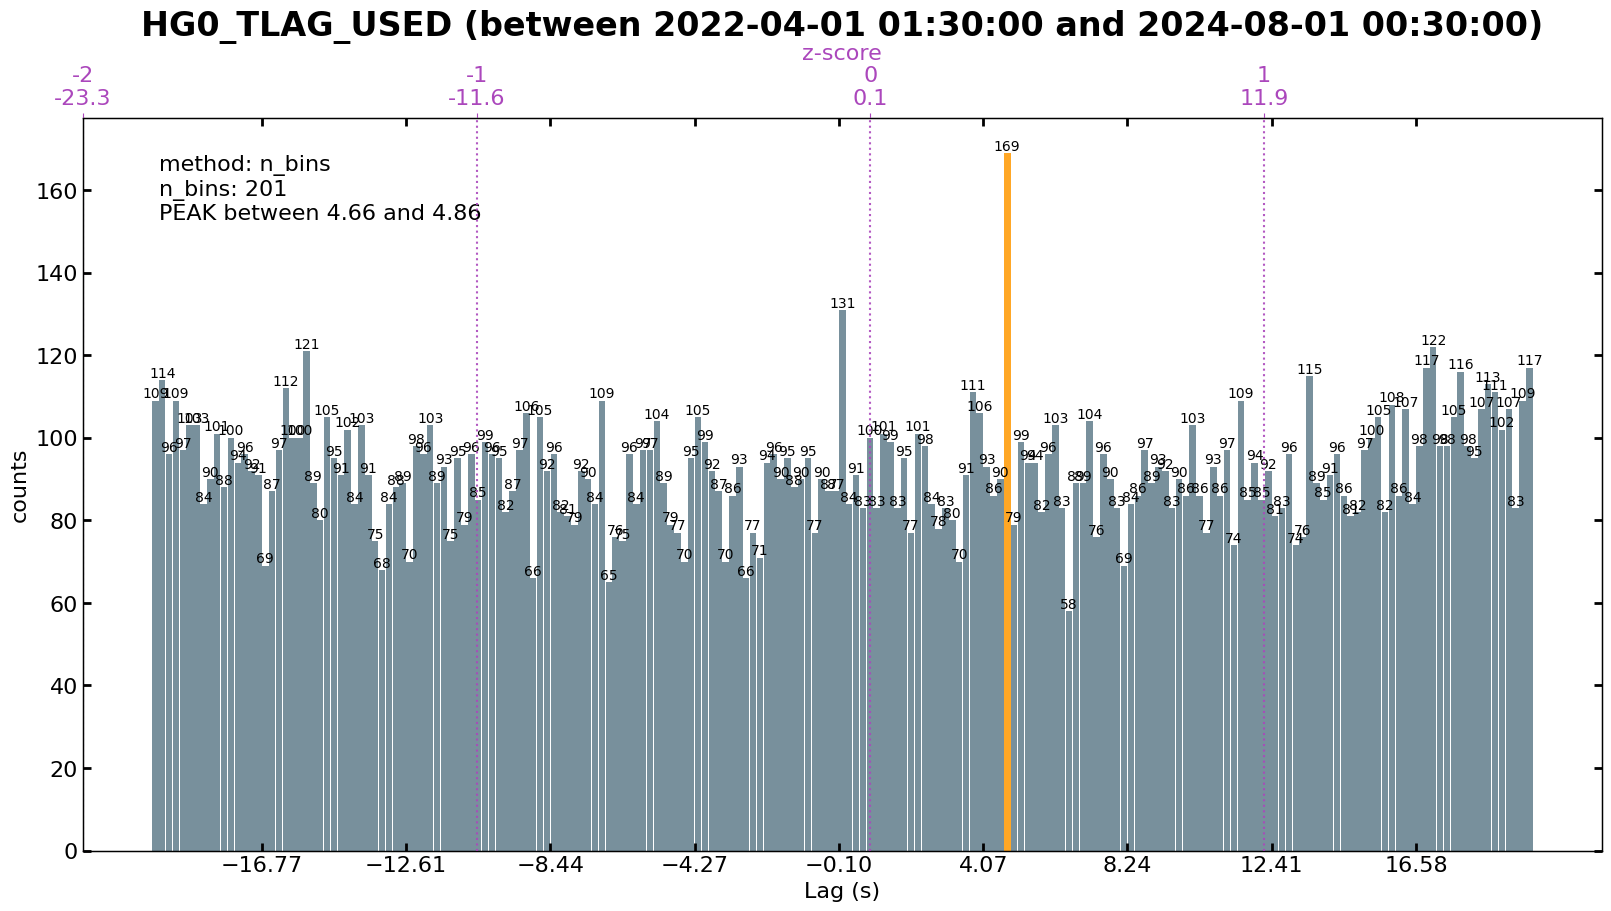

In [11]:
hist = HistogramPlot(
    s=lag20lin,
    method='n_bins',
    n_bins=201,    
    xlabel='Lag (s)',
    highlight_peak=True,
    show_zscores=True,
    show_zscore_values=True,
    show_counts=True,
    show_info=True,
    show_grid=False,
    show_title=True    
)
hist.plot()

# End of notebook

In [12]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-03-06 11:36:47
